# Import Package

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore") 

# Read the data

In [42]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Check Top 5 rows in the Dataset

In [43]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [44]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [45]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


# Check Basic info

In [46]:
print(customers.info())
print("--------------------------------------------------")
print(products.info())
print("--------------------------------------------------")
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns

# Shape of The dataset

In [68]:
print(f"Customers: {customers.shape}")
print(f"Transactions: {transactions.shape}")
print(f"Products: {products.shape}")

Customers: (200, 4)
Transactions: (1000, 8)
Products: (100, 4)


# Check Missing Values

In [69]:
print(customers.isnull().sum())
print("----------------")
print(products.isnull().sum())
print("----------------")
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
----------------
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
----------------
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
PricePoint         0
dtype: int64


# Check Duplicate Value 

In [48]:
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


# Customer Analysis

# Distribution of customers by region

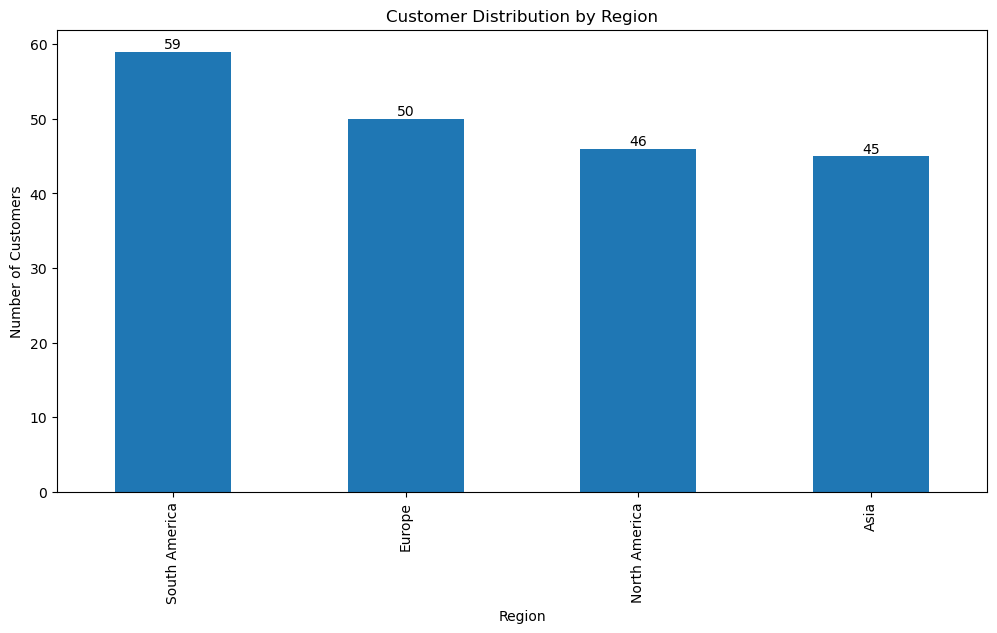

In [49]:
region_distribution = customers['Region'].value_counts()
plt.figure(figsize=(12,6))
ax=region_distribution.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# Signup Trends

In [50]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
yearly_signups = customers.groupby(customers['SignupDate'].dt.year).size()
monthly_signups = customers.groupby(customers['SignupDate'].dt.month).size()

# Yearly signups

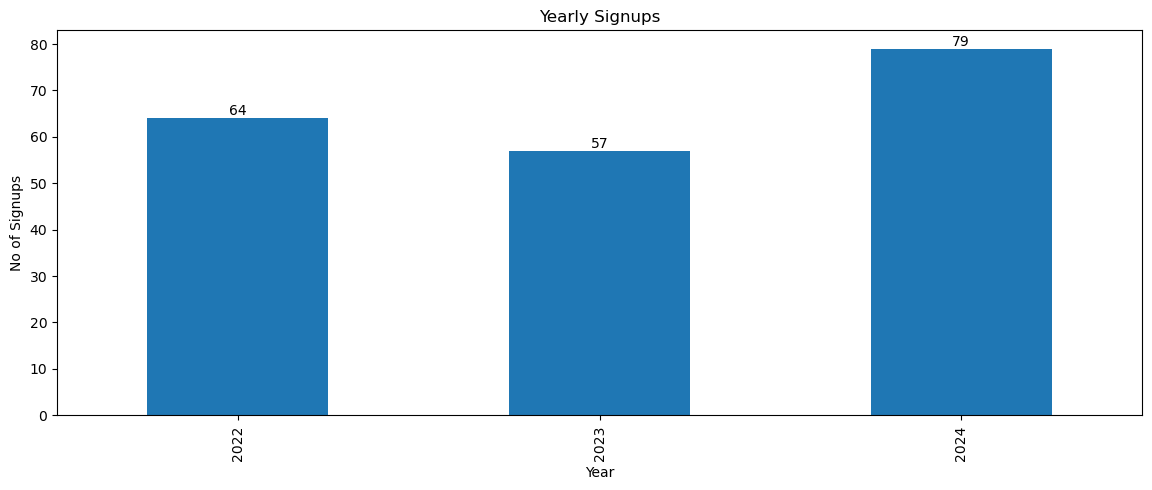

In [51]:
plt.figure(figsize=(14,5))
ax=yearly_signups.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title("Yearly Signups")
plt.xlabel("Year")
plt.ylabel("No of Signups")
plt.show()

# Monthly signups

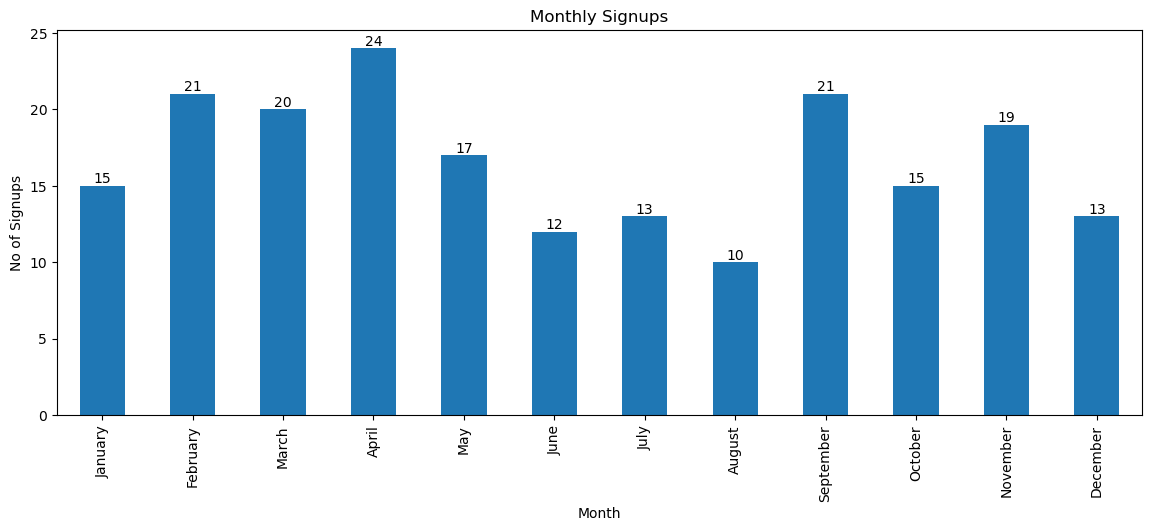

In [52]:
plt.figure(figsize=(14,5))
monthly_signups.index = ['January', 'February', 'March', 'April', 'May', 'June', 
                         'July', 'August', 'September', 'October', 'November', 'December']
ax=monthly_signups.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title("Monthly Signups")
plt.xlabel("Month")
plt.ylabel("No of Signups")
plt.show()

# Product Analysis

In [53]:
print("\nProduct Analysis:")
print(f"Total products: {len(products)}")
print("\nProducts by category:")
print(products['Category'].value_counts())


Product Analysis:
Total products: 100

Products by category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


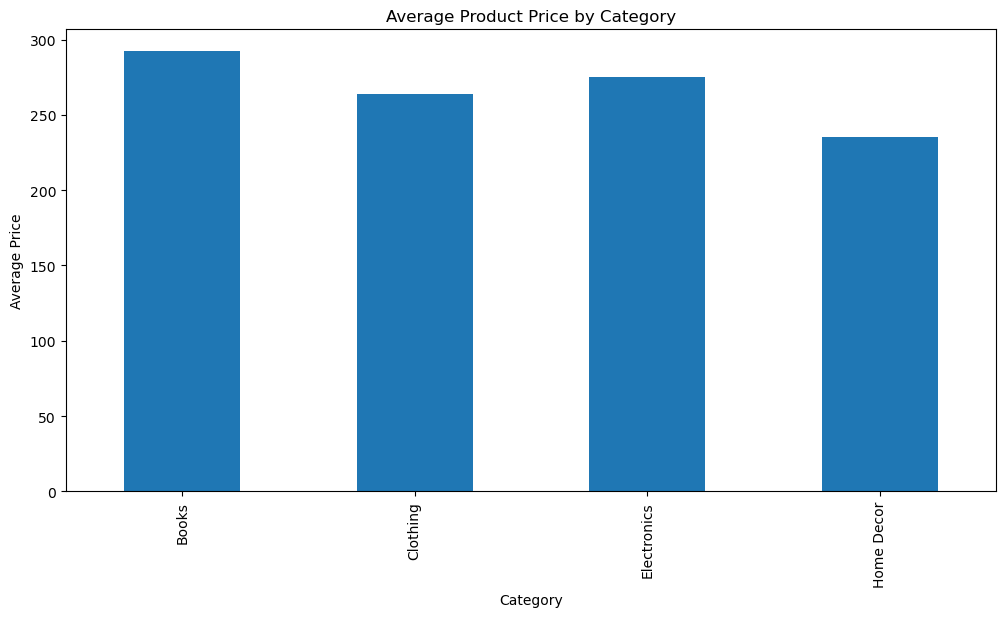

In [54]:
category_distribution = products['Category'].value_counts()
price_stats = products.groupby('Category')['Price'].agg(['mean', 'min', 'max'])
plt.figure(figsize=(12,6))
price_stats['mean'].plot(kind='bar')
plt.title('Average Product Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()

In [55]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
print("\nTop 10 selling products:")
print(top_products.head(10))


Top 10 selling products:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


# Transactions Analysis

In [56]:
merged_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

In [57]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
total_revenue = merged_data['TotalValue'].sum()
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.month)['TotalValue'].sum()
sales_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].agg(['sum', 'count'])

# Total Revenue

In [58]:
print("The Total Revenue",total_revenue)

The Total Revenue 689995.56


# Monthly Sales

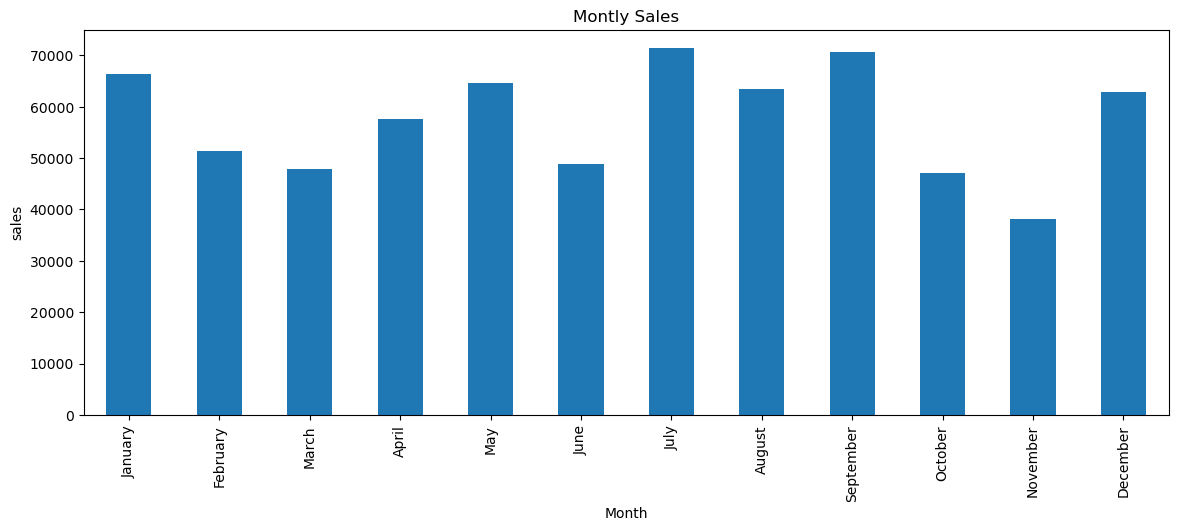

In [59]:
plt.figure(figsize=(14,5))
monthly_sales.index=['January', 'February', 'March', 'April', 'May', 'June', 
                         'July', 'August', 'September', 'October', 'November', 'December']
monthly_signups.plot(kind='bar')
monthly_sales.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("sales")
plt.title("Montly Sales")
plt.show()

# Sales by Category

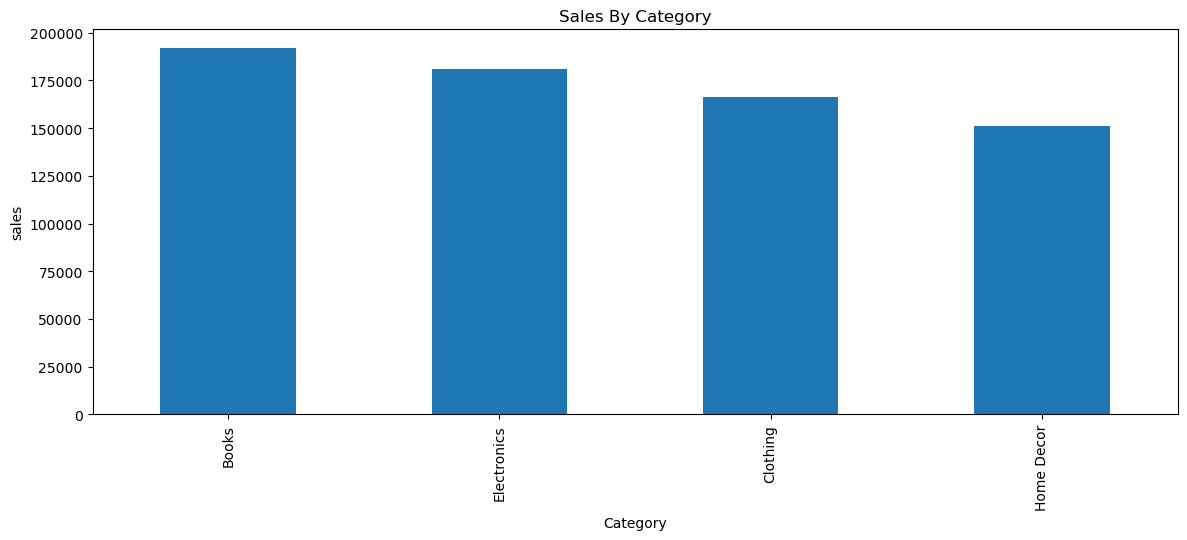

In [60]:
plt.figure(figsize=(14,5))
sales_by_category.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("sales")
plt.title("Sales By Category")
plt.show()

# Customer Spending

In [61]:
print("The Customer spending:")
print("-----------------------")
print(customer_spending)

The Customer spending:
-----------------------
                sum  count
CustomerID                
C0001       3354.52      5
C0002       1862.74      4
C0003       2725.38      4
C0004       5354.88      8
C0005       2034.24      3
...             ...    ...
C0196       4982.88      4
C0197       1928.65      3
C0198        931.83      2
C0199       1979.28      4
C0200       4758.60      5

[199 rows x 2 columns]


# Business Insights

# Insight 1: Customer Retention and Purchase Frequency

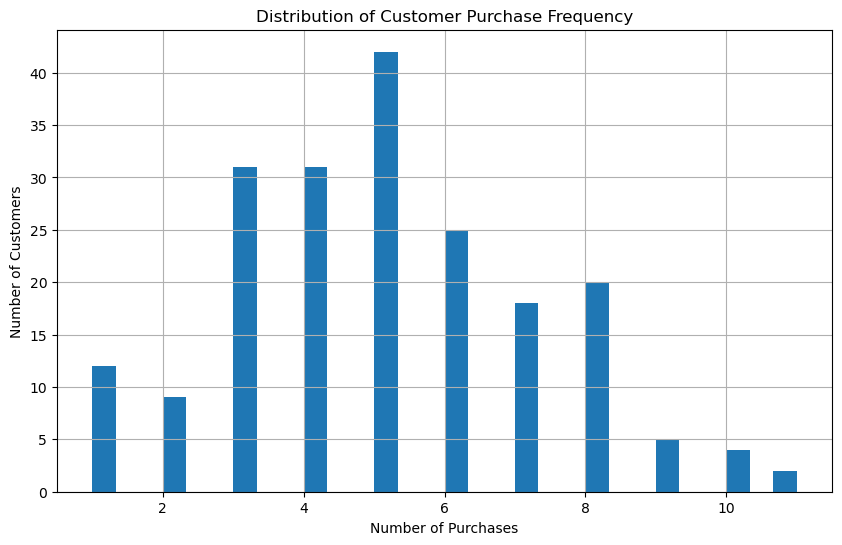


Customer Retention Insight:
- 93.5% of customers are repeat buyers
- Average purchases per customer: 5.03
- Median purchases per customer: 5.00


In [62]:
customer_purchase_counts = transactions.groupby('CustomerID').size()
repeat_customers = (customer_purchase_counts > 1).sum()
repeat_customer_rate = (repeat_customers / len(customers)) * 100

plt.figure(figsize=(10, 6))
customer_purchase_counts.hist(bins=30)
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

print(f"\nCustomer Retention Insight:")
print(f"- {repeat_customer_rate:.1f}% of customers are repeat buyers")
print(f"- Average purchases per customer: {customer_purchase_counts.mean():.2f}")
print(f"- Median purchases per customer: {customer_purchase_counts.median():.2f}")

**Customer Retention and Purchase Frequency**


An impressive 93.5% of customers are repeat buyers, reflecting strong customer retention and engagement. The average number of purchases per customer stands at 5.03, with a median of 5.00, indicating a consistent buying pattern across the customer base. This high retention rate highlights the effectiveness of current customer experience strategies. To further capitalize on this, the business could implement loyalty programs or exclusive offers for frequent shoppers. Retaining these repeat buyers ensures a stable revenue stream while reducing the costs associated with acquiring new customers, making this a critical area for ongoing focus and investment

# Insight 2: Product Category Performance

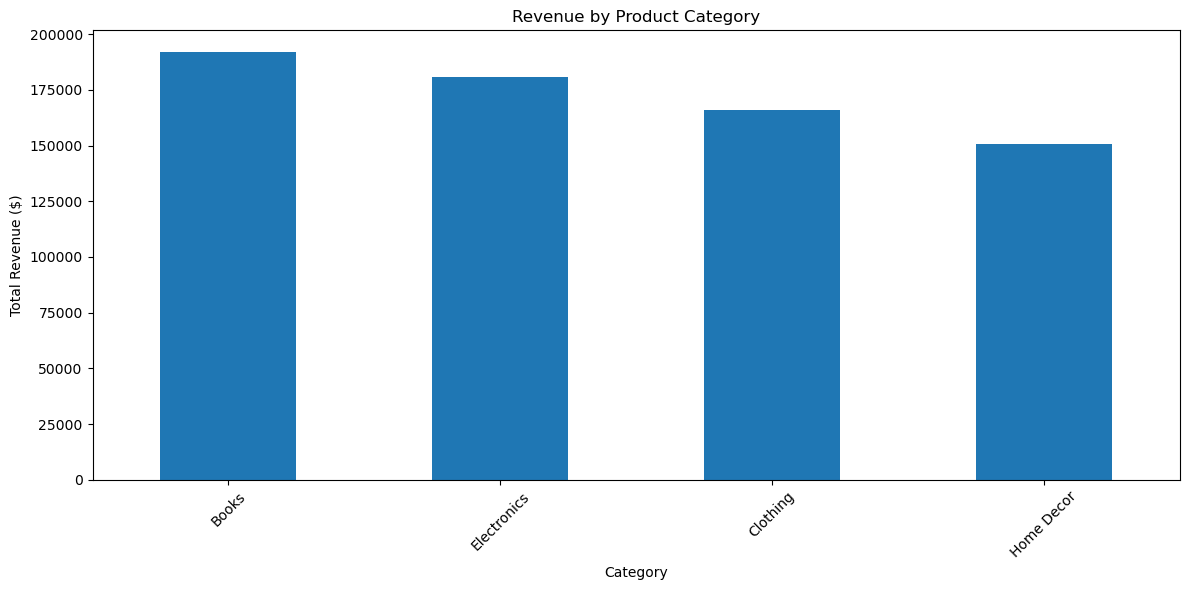


Category Performance Insight:
            TotalValue               Quantity
                   sum    mean count      sum
Category                                     
Books        192147.47  711.66   270      681
Electronics  180783.50  711.75   254      627
Clothing     166170.66  728.82   228      590
Home Decor   150893.93  608.44   248      639


In [63]:
category_performance = transactions.merge(products, on='ProductID').groupby('Category').agg({
    'TotalValue': ['sum', 'mean', 'count'],
    'Quantity': 'sum'
}).round(2)

# Sort by total revenue
category_performance = category_performance.sort_values(('TotalValue', 'sum'), ascending=False)

# Plot category performance
plt.figure(figsize=(12, 6))
category_revenue = category_performance[('TotalValue', 'sum')]
category_revenue.plot(kind='bar')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nCategory Performance Insight:")
print(category_performance)

**Product Category Performance**


The analysis reveals that Books generate the highest revenue at $192,147.47, accounting for 270 transactions and 681 units sold. Despite slightly lower total revenue (180,783.50), Electronics demonstrate strong performance with a comparable average transaction value (711.75) and 627 units sold. Clothing and Home Decor also perform well, contributing significantly to overall sales. The data suggests a balanced portfolio, with Books leading in volume and Electronics excelling in value. To maximize revenue, consider promoting top-selling categories like Books and Electronics while exploring strategies to boost average order value and unit sales in lower-performing categories.

# Insight 3: Regional Performance

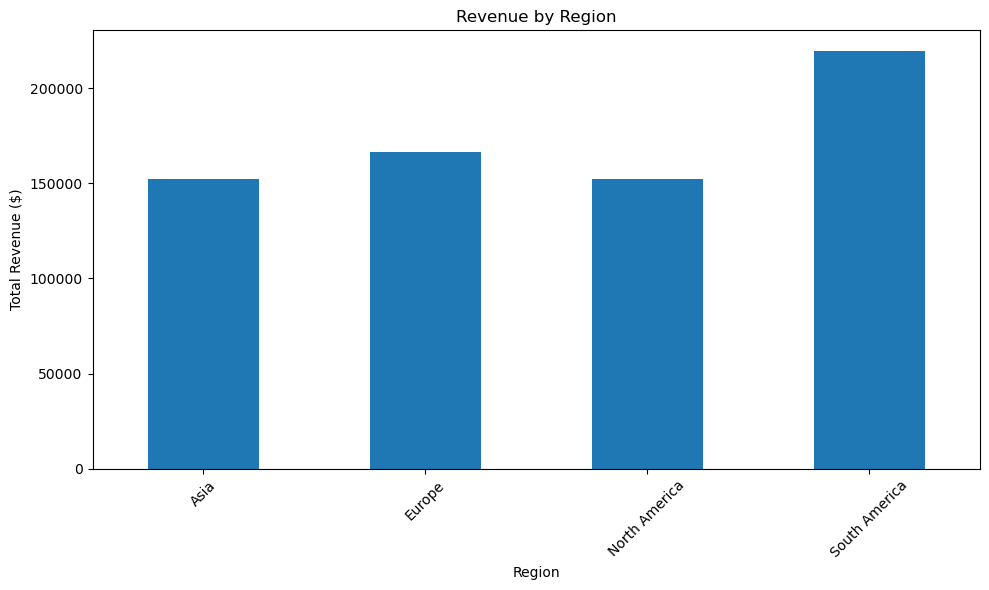


Regional Performance Insight:
              TotalValue               CustomerID AvgOrderValue
                     sum    mean count    nunique              
Region                                                         
Asia           152074.97  697.59   218         44    697.591606
Europe         166254.63  710.49   234         50    710.489872
North America  152313.40  624.24   244         46    624.235246
South America  219352.56  721.55   304         59    721.554474


In [64]:
regional_performance = transactions.merge(customers, on='CustomerID').groupby('Region').agg({
    'TotalValue': ['sum', 'mean', 'count'],
    'CustomerID': 'nunique'
}).round(2)

# Calculate average order value per region
regional_performance['AvgOrderValue'] = regional_performance[('TotalValue', 'sum')] / regional_performance[('TotalValue', 'count')]

# Plot regional performance
plt.figure(figsize=(10, 6))
regional_performance[('TotalValue', 'sum')].plot(kind='bar')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nRegional Performance Insight:")
print(regional_performance)

**Regional Performance**


South America leads in revenue generation with 219,352.56 from 304 transactions and an average order value of 721.55, highlighting its status as a key market. Europe follows closely with 166,254.63 and the highest customer count (50 unique customers), indicating strong customer engagement. Asia and North America contribute significantly but have slightly lower revenues and average order values. To optimize growth, the business can further target high-performing regions like South America and Europe with tailored campaigns while exploring strategies to boost engagement and average order value in Asia and North America. This ensures balanced regional growth.

# Insight 4: Price Sensitivity Analysis

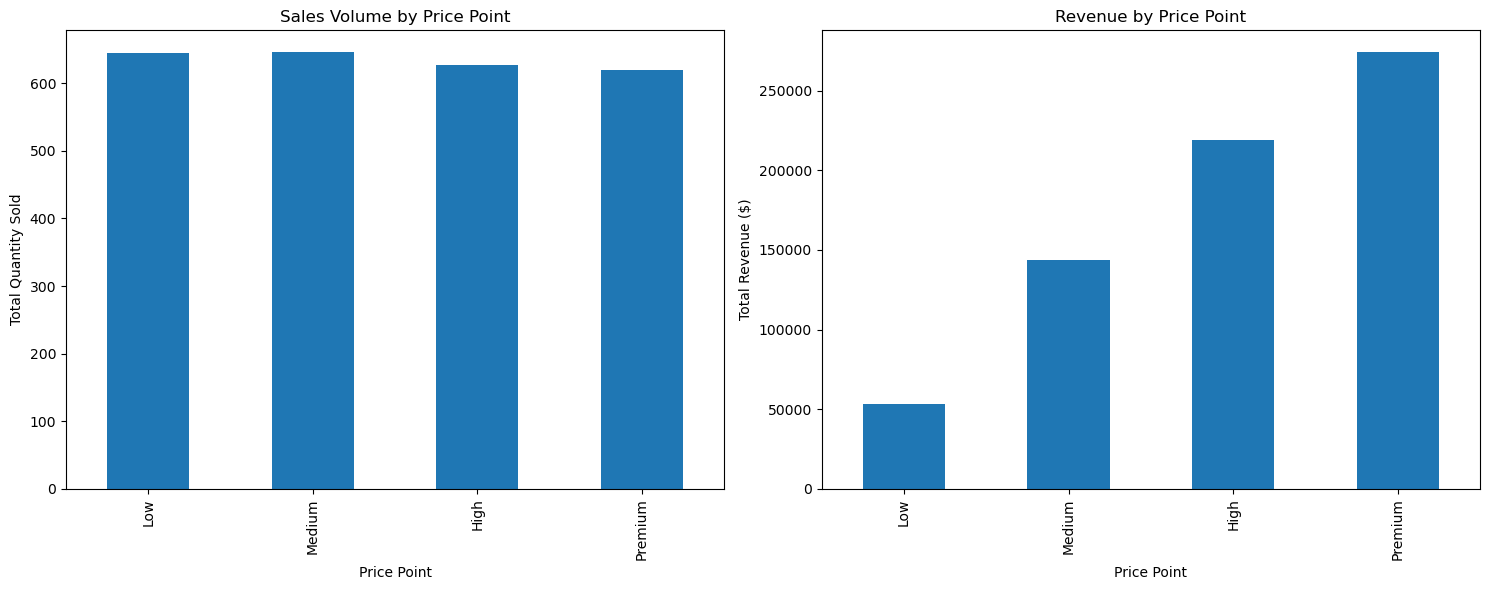


Price Sensitivity Insight:
           Quantity       TotalValue          TransactionID
                sum  mean        sum     mean         count
PricePoint                                                 
Low             645  2.53   53205.46   208.65           255
Medium          646  2.59  143781.86   577.44           249
High            627  2.50  218773.68   871.61           251
Premium         619  2.53  274234.56  1119.32           245


In [65]:
transactions['PricePoint'] = pd.qcut(transactions['Price'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])
price_point_performance = transactions.groupby('PricePoint').agg({
    'Quantity': ['sum', 'mean'],
    'TotalValue': ['sum', 'mean'],
    'TransactionID': 'count'
}).round(2)

# Plot price point performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

price_point_performance[('Quantity', 'sum')].plot(kind='bar', ax=ax1)
ax1.set_title('Sales Volume by Price Point')
ax1.set_xlabel('Price Point')
ax1.set_ylabel('Total Quantity Sold')

price_point_performance[('TotalValue', 'sum')].plot(kind='bar', ax=ax2)
ax2.set_title('Revenue by Price Point')
ax2.set_xlabel('Price Point')
ax2.set_ylabel('Total Revenue ($)')

plt.tight_layout()
plt.show()

print("\nPrice Sensitivity Insight:")
print(price_point_performance)

**Price Sensitivity Analysis**

The analysis shows that Premium-priced products generate the highest revenue at 274,234.56 with an average transaction value of 1,119.32, despite having the lowest sales volume (619 units). High-priced products follow closely with 218,773.68, indicating strong demand for higher-priced items. Medium-priced products balance sales volume (646 units) and revenue (143,781.86), while Low-priced products contribute the least revenue (53,205.46) despite similar sales volume. This highlights an opportunity to focus on promoting premium and high-priced products, leveraging their profitability, while reevaluating strategies for low-priced items to improve their contribution to the business.

# Insight 5: Customer Lifecycle Value

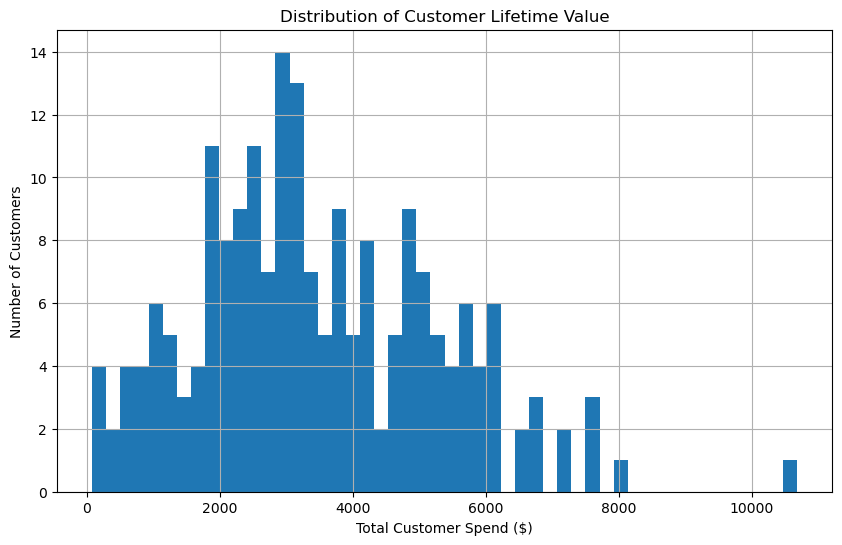


Customer Lifecycle Value Insight:
Average Customer Lifetime Value: $3467.31

Customer Spending Percentiles:
0.2    1953.234
0.4    2872.170
0.6    3713.944
0.8    5061.318
Name: TotalValue, dtype: float64

Customer Metrics Summary:
       TotalSpent  AvgOrderValue  PurchaseCount
count      199.00         199.00         199.00
mean      3467.31         687.58           5.03
std       1832.68         237.94           2.20
min         82.36          82.36           1.00
25%       2162.04         542.94           3.00
50%       3137.66         677.21           5.00
75%       4770.23         828.62           6.00
max      10673.87        1323.13          11.00


In [66]:
customer_total_value = transactions.groupby('CustomerID')['TotalValue'].sum()
customer_metrics = pd.DataFrame({
    'TotalSpent': customer_total_value,
    'AvgOrderValue': transactions.groupby('CustomerID')['TotalValue'].mean(),
    'PurchaseCount': transactions.groupby('CustomerID').size()
})

# Calculate percentiles
percentiles = customer_total_value.quantile([0.2, 0.4, 0.6, 0.8])

plt.figure(figsize=(10, 6))
customer_total_value.hist(bins=50)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Total Customer Spend ($)')
plt.ylabel('Number of Customers')
plt.show()

print("\nCustomer Lifecycle Value Insight:")
print(f"Average Customer Lifetime Value: ${customer_total_value.mean():.2f}")
print("\nCustomer Spending Percentiles:")
print(percentiles)
print("\nCustomer Metrics Summary:")
print(customer_metrics.describe().round(2))

**Customer Lifecycle Value**

The average customer lifetime value (CLV) is 3,467.31, with top spenders reaching 10,673.87. Customers in the top 20 spend over 5,061.32, showcasing a high-value segment crucial for sustained profitability. The median spend is 3,137.66, indicating a strong mid-tier customer base. Average order values range from 82.36 to 1,323.13, with a standard deviation of 237.94, reflecting diverse spending habits. Strategies to increase CLV include personalized offers for high spenders and loyalty programs targeting mid-tier customers. Additionally, identifying and nurturing low-value customers through targeted campaigns could unlock untapped revenue potential, further driving overall growth.